# _Deep Learning - Artificial Neural Networks / Derin Öğrenme - Yapay Sinir Ağları_

_Bugün insan beyninin öğrenme modelini taklit ederek öğrenen yapay sinir ağlarını derinlemesini öğreneceğiz._

#### _Classification_

_Cevabu evet hayır olan sorular = classifition_

In [1]:
import pandas as pd
# pandas: veri işleme ve analiz kütüphanesi

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
# CSV dosyasını okur ve df adlı DataFrame’e aktarır

In [3]:
df.head()
# DataFrame’in ilk 5 satırını gösterir (veriyi tanımak için kullanılır)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape
# Veri kümesinin satır ve sütun sayısını gösterir (ör: (768, 9))

(768, 9)

In [5]:
df.isnull().sum()
# Her sütunda kaç adet eksik veri (NaN) olduğunu gösterir

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#pip install tensorflow

In [7]:
# TensorFlow kütüphanesini yüklemek için terminal komutu
# Tensor: çok boyutlu matris demektir (vektör, matris veya yüksek boyutlu dizi)

In [8]:
df.head()
# DataFrame’in ilk 5 satırını gösterir (veriyi tanımak için kullanılır)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.columns
# DataFrame’deki sütun isimlerini listeler

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##### _Yöntem 1_

In [10]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# Bağımsız değişkenler (girdiler): modelin tahmin için kullanacağı özellikler

y = df[['Outcome']]
# Bağımlı değişken (çıktı): diyabet olup olmama (0 = hayır, 1 = evet)

##### _Yöntem 2_

In [11]:
x = df.drop('Outcome', axis=1)
# 'Outcome' sütununu kaldırır, geri kalan tüm sütunlar X (bağımsız değişkenler) olur

y = df[['Outcome']]
# 'Outcome' sütunu Y (bağımlı değişken) olarak alınır

In [12]:
df.head()
# Veri kümesinin ilk 5 satırını yeniden gösterir

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### _Yöntem 3_

In [13]:
x = df.iloc[:, 0:8]
# iloc: konuma göre seçim yapar
# 0. sütundan başlayıp 8. sütuna kadar (8 dahil değil) olanları X'e atar

y = df.iloc[:, 8]
# 8. sütunu (Outcome) Y'ye atar

# iloc = "şurdan başla, şuraya kadar git" mantığıyla çalışır

##### _Neural Network Modeli_

In [14]:
from tensorflow.keras.models import Sequential
# Sequential: katmanları sırayla ekleyerek model kurmamızı sağlar

from tensorflow.keras.layers import Dense
# Dense: tam bağlantılı (fully connected) yapay sinir ağı katmanı

In [15]:
model = Sequential()
# Boş bir yapay sinir ağı (ANN) modeli oluşturur

model.add(Dense(80, activation='relu'))
# İlk gizli katman: 80 nöron (tamamen varsayımsal, hiçbir dayanak yok, hayal ürünü), aktivasyon: ReLU

model.add(Dense(120, activation='relu'))
# İkinci gizli katman: 120 nöron, öğrenme kapasitesini artırır

model.add(Dense(80, activation='relu'))
# Üçüncü gizli katman: tekrar 80 nöron

model.add(Dense(30, activation='relu'))
# Dördüncü gizli katman: 30 nöron (boyut küçülüyor, derinlikten yüzeye iniyoruz)

model.add(Dense(1, activation='sigmoid'))
# Çıkış katmanı: 1 nöron (binary classification için zorunlu)
# Sigmoid: 0 ile 1 arasında olasılık üretir (diyabet var/yok)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss = binary_crossentropy: iki sınıflı problemler için uygun
# optimizer = adam: en sık kullanılan optimizasyon algoritması
# metrics = accuracy: doğruluk ölçüsü hesaplanır

# Dense: tüm nöronlar bir önceki katmandaki tüm nöronlara bağlanır (fully connected)
# Bir katmanın çıktısı bir sonraki katmanın girdisi olur

In [16]:
history = model.fit(
    x, 
    y, 
    batch_size=32,          # Her adımda modele 32 veri örneği gösterilir
    validation_split=0.10,  # Verinin %10'u doğrulama (validation) için ayrılır. Dolayısıyla tekrardan train_test_split yapmama gerek kalmaz.
    verbose=2,              # Eğitim çıktılarının ekranda gösterim detay seviyesi
    epochs=1000             # Model veriyi 1000 kez tekrar tekrar görerek öğrenir
)
# model.fit: modeli eğiten fonksiyondur
# Eğitim sürecindeki kayıp (loss) ve doğruluk (accuracy) değerleri "history" içinde tutulur

Epoch 1/1000
22/22 - 12s - 539ms/step - accuracy: 0.5774 - loss: 1.2298 - val_accuracy: 0.6753 - val_loss: 0.6248
Epoch 2/1000
22/22 - 0s - 4ms/step - accuracy: 0.6310 - loss: 0.8416 - val_accuracy: 0.5584 - val_loss: 0.7586
Epoch 3/1000
22/22 - 0s - 4ms/step - accuracy: 0.6469 - loss: 0.7298 - val_accuracy: 0.6883 - val_loss: 0.6806
Epoch 4/1000
22/22 - 0s - 4ms/step - accuracy: 0.6700 - loss: 0.6169 - val_accuracy: 0.5844 - val_loss: 0.7904
Epoch 5/1000
22/22 - 0s - 4ms/step - accuracy: 0.6845 - loss: 0.6453 - val_accuracy: 0.6753 - val_loss: 0.6438
Epoch 6/1000
22/22 - 0s - 4ms/step - accuracy: 0.6614 - loss: 0.6351 - val_accuracy: 0.6234 - val_loss: 0.7240
Epoch 7/1000
22/22 - 0s - 4ms/step - accuracy: 0.7091 - loss: 0.5920 - val_accuracy: 0.6364 - val_loss: 0.6746
Epoch 8/1000
22/22 - 0s - 4ms/step - accuracy: 0.6918 - loss: 0.6501 - val_accuracy: 0.6364 - val_loss: 0.7754
Epoch 9/1000
22/22 - 0s - 4ms/step - accuracy: 0.6903 - loss: 0.6549 - val_accuracy: 0.5714 - val_loss: 0.876

In [17]:
model.summary()
# Modelin katmanlarını, her katmandaki nöron sayısını,
# toplam parametre (ağırlık + bias) miktarını
# ve genel mimari yapısını tablo halinde gösterir

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,745 (264.63 KB)

 Trainable params: 22,581 (88.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,164 (176.43 KB)

In [18]:
loss, accuracy = model.evaluate(x, y)
# evaluate: modeli verilen veri üzerinde test eder
# loss: modelin hata miktarı (ne kadar düşükse o kadar iyi)
# accuracy: modelin doğruluk oranı (0 ile 1 arasında değer döner)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9714 - loss: 0.4891     


In [19]:
accuracy
# Eğitilen modelin doğruluk (accuracy) değerini ekranda gösterir
# 1'e ne kadar yakınsa model o kadar iyi tahmin yapıyor demektir

0.9713541865348816

##### _Verilerin Standardize Edilmesi (StandardScaler)_

In [20]:
from sklearn.preprocessing import StandardScaler
# Verileri ölçeklemek (standartlaştırmak) için kullanılan sınıf

In [21]:
scaler = StandardScaler()
# StandardScaler nesnesi oluşturulur (ortalama=0, std=1 olacak şekilde ölçeklendirme yapar)

In [22]:
x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

In [23]:
history = model.fit(
    x, y,
    batch_size=32,          # Her adımda 32 örnek kullanılır
    validation_split=0.10,  # Verinin %10'u doğrulama için ayrılır
    verbose=2,              # Eğitim çıktısı detay seviyesi
    epochs=100              # Model veri üzerinde 100 kez eğitilir
)
# Ölçeklendirilmiş veri ile model yeniden eğitilir

Epoch 1/100
22/22 - 0s - 5ms/step - accuracy: 0.6715 - loss: 1.4662 - val_accuracy: 0.5714 - val_loss: 0.8763
Epoch 2/100
22/22 - 0s - 4ms/step - accuracy: 0.7149 - loss: 0.5764 - val_accuracy: 0.6104 - val_loss: 0.6697
Epoch 3/100
22/22 - 0s - 4ms/step - accuracy: 0.7366 - loss: 0.4995 - val_accuracy: 0.6494 - val_loss: 0.6356
Epoch 4/100
22/22 - 0s - 5ms/step - accuracy: 0.7815 - loss: 0.4454 - val_accuracy: 0.7792 - val_loss: 0.6329
Epoch 5/100
22/22 - 0s - 4ms/step - accuracy: 0.7858 - loss: 0.4284 - val_accuracy: 0.7403 - val_loss: 0.6054
Epoch 6/100
22/22 - 0s - 4ms/step - accuracy: 0.8133 - loss: 0.4073 - val_accuracy: 0.7662 - val_loss: 0.6167
Epoch 7/100
22/22 - 0s - 5ms/step - accuracy: 0.8191 - loss: 0.3954 - val_accuracy: 0.7532 - val_loss: 0.6437
Epoch 8/100
22/22 - 0s - 4ms/step - accuracy: 0.8191 - loss: 0.3888 - val_accuracy: 0.7273 - val_loss: 0.6103
Epoch 9/100
22/22 - 0s - 4ms/step - accuracy: 0.8394 - loss: 0.3496 - val_accuracy: 0.7143 - val_loss: 0.6506
Epoch 10/1

In [24]:
loss, accuracy = model.evaluate(x, y)
# Modelin ölçeklendirilmiş veri üzerindeki performansını ölçer

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.2642 


In [25]:
accuracy
# Doğruluk oranını ekranda gösterir

0.9752604365348816

In [26]:
import matplotlib.pyplot as plt
# Grafik çizimleri (plot) yapmak için kullanılan kütüphane

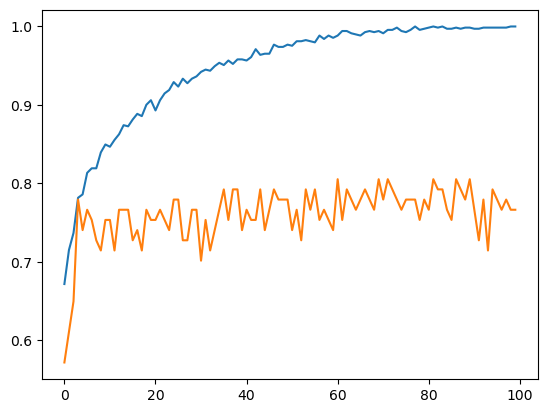

In [27]:
plt.plot(history.history['accuracy'])
# Eğitim (train) doğruluk değerlerinin epoch’lara göre değişimini çizer

plt.plot(history.history['val_accuracy'])
# Doğrulama (validation) doğruluk değerlerini çizer; modelin aşırı öğrenip öğrenmediğini anlamak için kullanılır

#### _Regression_ 

In [28]:
df = pd.read_pickle('kc_house.pkl')
# Pickle formatındaki veri dosyasını okur ve DataFrame’e aktarır

In [29]:
df.head()
# Veri kümesinin ilk 5 satırını gösterir

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x = df.drop('price', axis=1)
# 'price' dışındaki tüm sütunları bağımsız değişken (X) olarak alır
# Ev özellikleri burada yer alır (metrekare, oda sayısı vb.)

y = df[['price']]
# 'price' sütunu bağımlı değişken (Y) olarak alınır
# Tahmin edilmek istenen değer: evin fiyatı

In [31]:
x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

In [32]:
model = Sequential()
# Boş bir yapay sinir ağı (ANN) modeli oluşturur

model.add(Dense(80, activation='relu'))
# İlk gizli katman: 80 nöron, aktivasyon: ReLU

model.add(Dense(128, activation='relu'))
# İkinci gizli katman: 128 nöron, daha yüksek öğrenme kapasitesi

model.add(Dense(100, activation='relu'))
# Üçüncü gizli katman: 100 nöron

model.add(Dense(80, activation='relu'))
# Dördüncü gizli katman: 80 nöron

model.add(Dense(30, activation='relu'))
# Beşinci gizli katman: 30 nöron (katmanlar küçülmeye başlıyor)

model.add(Dense(8, activation='relu'))
# Altıncı gizli katman: 8 nöron

model.add(Dense(1))
# Çıkış katmanı: 1 nöron
# REGRESYON olduğundan *sigmoid veya softmax kullanılmaz*
# Doğrudan sayısal (sürekli) bir değer üretir

model.compile(loss='mean_squared_error', optimizer='adam')
# loss = MSE: regresyon problemlerinde kullanılan hata fonksiyonu
# optimizer = adam: parametre güncellemesi için kullanılan yöntem

In [33]:
from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test seti olarak ayırmak için kullanılır

In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,      # Verinin %20’si test için ayrılır
    random_state=42      # Tekrar çalıştırıldığında aynı bölünmeyi sağlar (sabitlik)
)
# train_test_split: veriyi eğitim ve test seti olarak ikiye ayırır

In [35]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),  # Test verisi doğrulama için kullanılıyor
    batch_size=64,                     # Her adımda modele 64 örnek gösterilir
    verbose=1,                         # Eğitim sürecini detaylı şekilde ekrana yazdırır
    epochs=120                         # Model veri üzerinde 120 kez eğitilir
)
# fit: modeli eğiten fonksiyondur
# Eğitim ve doğrulama (validation) performansları "history" değişkeni içinde saklanır

Epoch 1/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 132697767936.0000 - val_loss: 9943131136.0000
Epoch 2/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8666306560.0000 - val_loss: 8703791104.0000
Epoch 3/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8106599424.0000 - val_loss: 8425548288.0000
Epoch 4/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7926225408.0000 - val_loss: 8301946880.0000
Epoch 5/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7730360320.0000 - val_loss: 8187610624.0000
Epoch 6/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7609027584.0000 - val_loss: 8174631936.0000
Epoch 7/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7556698112.0000 - val_loss: 8225725440.0000
Epoch 8/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7391961600.0000 - val_loss: 8211951616.0000
Epoch 9/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7342803456.0000 - val_loss: 8081488384.0000
Epoch 10/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [36]:
tahmin = model.predict(x_test)
# Eğitilen modelin test verisi üzerindeki tahminlerini üretir
# Regresyon olduğu için çıktılar ev fiyatı tahminleridir (sürekli sayısal değerler)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [37]:
from sklearn.metrics import r2_score, mean_squared_error
# R2 skorunu ve Ortalama Kare Hatasını (MSE) hesaplamak için metrikler

In [38]:
r2_score(y_test, tahmin)
# R² skoru: modelin gerçek fiyatları ne kadar iyi açıkladığını gösterir
# 1'e ne kadar yakınsa model o kadar başarılıdır

0.845687747001648

In [39]:
mean_squared_error(y_test, tahmin)**0.5
# RMSE (Root Mean Squared Error): Hata miktarının kök ortalama kare değeri
# Hata ne kadar düşükse model o kadar iyidir

88878.29917364531

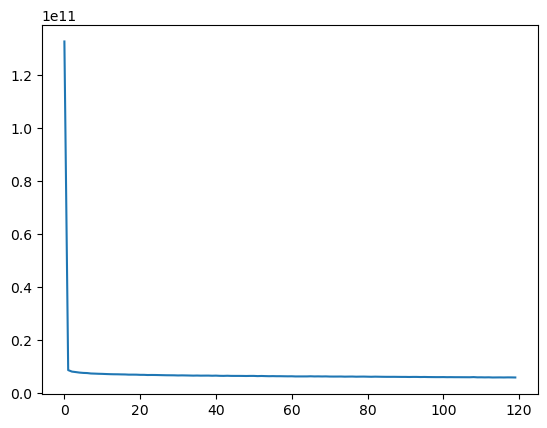

In [40]:
plt.plot(history.history['loss'])
# Eğitim sürecindeki 'loss' (MSE) değerlerinin epoch'lara göre değişimini çizer
# Eğri aşağı doğru gidiyorsa modelin öğrenmeye devam ettiği anlamına gelir

#### _Early Stopping - Önceden Dur_

In [41]:
df = pd.read_excel('cars.xls')
# Excel formatındaki veri dosyasını okur ve DataFrame’e aktarır

In [42]:
x = df.drop('Price', axis=1)
# 'Price' dışındaki tüm sütunlar bağımsız değişkenler (X) olur

y = df[['Price']]
# Tahmin edilecek değer olan 'Price' bağımlı değişken (Y) olarak alınır

In [43]:
x.head()
# x değişkenlerinin ilk 5 satırını görüntüler

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [44]:
x = pd.get_dummies(x, drop_first=True)
# Kategorik değişkenleri dummy (0-1) değişkenlere dönüştürür
# drop_first=True → multicollinearity (sahte bağıntı) oluşmasını engeller

In [45]:
x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

In [46]:
model = Sequential()
# Boş bir yapay sinir ağı modeli oluşturulur

model.add(Dense(64, activation='relu'))
# İlk gizli katman: 64 nöron, ReLU aktivasyonu

model.add(Dense(128, activation='relu'))
# İkinci gizli katman: 128 nöron, öğrenme kapasitesini artırır

model.add(Dense(256, activation='relu'))
# Üçüncü gizli katman: 256 nöron, modelin en geniş katmanı

model.add(Dense(128, activation='relu'))
# Dördüncü gizli katman: 128 nöron, daralmaya başlıyor

model.add(Dense(64, activation='relu'))
# Beşinci gizli katman: 64 nöron

model.add(Dense(32, activation='relu'))
# Altıncı gizli katman: 32 nöron

model.add(Dense(1))
# Çıkış katmanı: 1 nöron (regresyon problemi olduğu için aktivasyon kullanılmaz)

model.compile(loss='mean_squared_error', optimizer='adam')
# loss = MSE → regresyon için uygun hata fonksiyonu
# optimizer = adam → ağırlıkları güncellemek için kullanılan optimizasyon algoritması

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
# EarlyStopping: Eğitim sırasında belirli bir metrik iyileşmeyi durdurduğunda
# modeli otomatik olarak durduran callback yapısıdır.
# Overfitting'i engellemek ve gereksiz yere uzun eğitim süresini azaltmak için kullanılır.

In [48]:
early_stop = EarlyStopping(
    monitor='val_loss',  # İzlenen metrik: doğrulama kaybı (validation loss)
    patience=10          # 10 epoch boyunca iyileşme olmazsa eğitim durur
)
# EarlyStopping overfitting'i önler ve gereksiz uzun eğitim süresini kısaltır

In [49]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),  # Test verisi doğrulama için kullanılıyor
    epochs=130,                        # Maksimum eğitim sayısı
    batch_size=32,                     # Her adımda 32 örnek işlenir
    callbacks=[early_stop],            # EarlyStopping aktif: val_loss iyileşmezse durdurur
    verbose=1                          # Eğitim bilgilerini ekrana yazdırır
)
# EarlyStopping sayesinde model gereksiz yere uzun süre eğitilmez
# En iyi validation loss değerinin olduğu epoch’ta eğitim sonlanır

Epoch 1/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 53259542528.0000 - val_loss: 9275729920.0000
Epoch 2/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8287040000.0000 - val_loss: 8753887232.0000
Epoch 3/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7920232448.0000 - val_loss: 8315781120.0000
Epoch 4/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7743825920.0000 - val_loss: 8447545344.0000
Epoch 5/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7598310400.0000 - val_loss: 8160165376.0000
Epoch 6/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7465452544.0000 - val_loss: 8288015872.0000
Epoch 7/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7349441536.0000 - val_loss: 8095821312.0000
Epoch 8/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7287433728.0000 - val_loss: 8221070336.0000
Epoch 9/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7273738240.0000 - val_loss: 7926161920.0000
Epoch 10/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [50]:
tahmin = model.predict(x_test)
# Eğitilen modelin test verisi üzerindeki tahminlerini üretir
# Regresyon problemi olduğu için çıktı, aracın fiyat tahminidir (sürekli sayısal değer)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [51]:
r2_score(tahmin, y_test)
# Yanlış kullanım! r2_score fonksiyonu önce gerçek değerleri (y_true),
# sonra tahmin değerlerini (y_pred) ister.
# Bu nedenle doğru kullanım aşağıdaki gibi olmalıdır:
# r2_score(y_test, tahmin)

0.8263247013092041

#### _Torch_

In [52]:
#pip install torch

In [53]:
# PyTorch kütüphanesini yüklemek için kullanılan terminal komutu
# Derin öğrenme modelleri ve tensor işlemleri için gereklidir

In [54]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# df: Price içeren araç veri seti

x = df.drop('Price', axis=1)
# Bağımsız değişkenler (araç özellikleri)

y = df[['Price']]
# Bağımlı değişken: Tahmin edilmek istenen fiyat

x = pd.get_dummies(x, drop_first=True)
# Kategorik değişkenleri dummy değişkenlere dönüştürür
# drop_first=True → multicollinearity riskini azaltır

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
# Veriyi %80 eğitim, %20 test olarak böler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Sayısal verileri ölçeklendirir (ortalama=0, std=1)

# PyTorch tensörlerine dönüştürme
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# PyTorch Yapay Sinir Ağı Modeli
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1], 64)
        # Giriş katmanı → 64 nöron
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)
        # Çıkış katmanı → 1 nöron (regresyon)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        return self.fc7(x)
        # Son katmanda aktivasyon yok → regresyon için doğru kullanım

model = NeuralNetwork()
criterion = nn.MSELoss()
# Regresyon için MSE kayıp fonksiyonu

optimizer = optim.Adam(model.parameters())
# Adam optimizasyon algoritması

num_epochs = 130
batch_size = 32

# DataLoader: batch halinde eğitim için gerekli yapı
train_data = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Early Stopping için takip değişkenleri
best_loss = float('inf')
patience = 10
patience_counter = 0

# Eğitim döngüsü
for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Doğrulama (Validation)
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}] '
          f'Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}')

    # Early Stopping kontrolü
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break
# Bu eğitim döngüsü hem modeli eğitir hem de validation loss iyileşmediğinde durdurur

Epoch [1/130] Loss: 1077168128.0000 | Val Loss: 505517472.0000
Epoch [2/130] Loss: 206119472.0000 | Val Loss: 481048992.0000
Epoch [3/130] Loss: 15093457.0000 | Val Loss: 56956552.0000
Epoch [4/130] Loss: 7486129.5000 | Val Loss: 17512196.0000
Epoch [5/130] Loss: 1816849.3750 | Val Loss: 2826022.5000
Epoch [6/130] Loss: 242161.9375 | Val Loss: 1601360.3750
Epoch [7/130] Loss: 950148.0000 | Val Loss: 1055032.0000
Epoch [8/130] Loss: 1033175.5000 | Val Loss: 816629.0000
Epoch [9/130] Loss: 1420885.6250 | Val Loss: 739178.0625
Epoch [10/130] Loss: 742661.1875 | Val Loss: 689806.8750
Epoch [11/130] Loss: 761284.1875 | Val Loss: 638503.5625
Epoch [12/130] Loss: 689513.1250 | Val Loss: 603953.3125
Epoch [13/130] Loss: 514922.6250 | Val Loss: 573252.1875
Epoch [14/130] Loss: 5600.0171 | Val Loss: 612740.2500
Epoch [15/130] Loss: 605771.2500 | Val Loss: 556108.4375
Epoch [16/130] Loss: 730104.5625 | Val Loss: 546642.3750
Epoch [17/130] Loss: 1434847.0000 | Val Loss: 591025.4375
Epoch [18/130] 